# BigQuery for Data Warehousing
## Chapter 20 Sample code - dataframe


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Make sure to link `google cloud services` using menu under `add-ons`.[](http://)
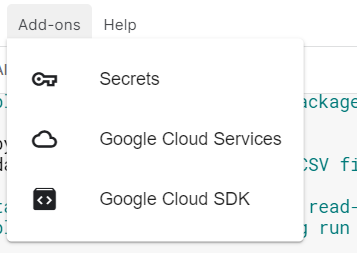


In [5]:
PROJECT_ID = '{your-project-id-here}'
from google.cloud import bigquery
bigquery_client = bigquery.Client(project=PROJECT_ID)

Optionally, you can use `%%` magic method

```
%%bigquery df
from google.cloud.bigquery import magics
magics.context.project = 'YOUR-PROJECT-ID'
```

In [6]:
sql = """
SELECT
store_number,
ANY_VALUE(store_location) store_location,
item_number,
ANY_VALUE(item_description) item_description,
DATE_TRUNC(date, MONTH) period,
ROUND(SUM(sale_dollars),2) sale_dollars,
ROUND(SUM(volume_sold_liters),2) volume_sold_liters,
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE date BETWEEN DATE(2019, 1, 1) AND DATE(2019, 12, 31)
GROUP BY store_number, item_number, period
"""
df = bigquery_client.query(sql).to_dataframe()
df[:10]



,store_number,store_location,item_number,item_description,period,sale_dollars,volume_sold_liters
0,5068,POINT (-95.14027400000002 43.361577),10804,Crown Royal Regal Apple,2019-02-01,14.16,0.4
1,5517,POINT (-91.170033 41.008539),11773,Black Velvet,2019-02-01,4.68,0.4
2,5236,POINT (-91.29083400000002 42.108203),11299,Crown Royal,2019-02-01,37.50,1.0
3,5385,POINT (-93.741511 41.580206),11299,Crown Royal,2019-02-01,15.00,0.4
4,3814,POINT (-93.806489 41.561342),14199,Pendleton Canadian Whisky,2019-02-01,2239.44,108.5
5,3842,POINT (-94.218 43.29355),11788,Black Velvet,2019-02-01,752.64,84.0
6,4489,POINT (-91.715925 41.979772),11788,Black Velvet,2019-02-01,282.24,31.5
7,4239,POINT (-95.106219 43.42157),11588,Black Velvet Reserve,2019-02-01,350.82,31.5
8,5343,POINT (-94.676021 41.870861),12467,Canadian Mist Whisky,2019-02-01,10.83,1.0
9,2556,POINT (-94.829962 43.402096),10627,Canadian Club Whisky,2019-02-01,72.85,5.0


In [21]:
# use this code if you want to see progress
#! pip install pandas-gbq

#df = pd.read_gbq(sql, dialect='standard', project_id='{your-project-id}') 

     |████████████████████████████████| 2.2 MB 960 kB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=ocYkxkjkepXTOnwJdVvBAmmZln9zmi&prompt=consent&access_type=offline
Enter the authorization code: 4/1AY0e-g7aj_5hQssYOFJYdyHVOuMoFQHcLtTBQjm1nxrnmVcExEpgcBdKR90


## Finding Bearings

In [8]:
df.count()


store_number          1690845
store_location        1536272
item_number           1690845
item_description      1690845
period                1690845
sale_dollars          1690845
volume_sold_liters    1690845
dtype: int64

In [9]:
df.sample(10)


,store_number,store_location,item_number,item_description,period,sale_dollars,volume_sold_liters
344654,4741,POINT (-95.839753 41.266015),43026,Admiral Nelson Spiced Rum,2019-03-01,208.08,18.00
1436145,4427,POINT (-91.636982 41.752948),36301,Hawkeye Vodka Mini,2019-01-01,24.80,2.00
1596839,4901,POINT (-93.719323 41.763876),64870,Fireball Cinnamon Whiskey,2019-10-01,64.80,4.80
1046408,2544,POINT (-92.912817 42.039205),73715,Evan Williams Cherry Reserve,2019-07-01,35.73,2.25
506562,2555,POINT (-91.403752 40.41538),67586,Kapali Coffee Liqueur,2019-12-01,60.06,5.25
1472716,3632,POINT (-90.736955 42.489041),35318,Barton Vodka,2019-01-01,249.12,42.00
822273,2572,POINT (-92.435236 42.512789),16580,Baker's 7YR,2019-05-01,90.00,1.50
976736,5539,POINT (-93.653318 41.680398),89196,Jose Cuervo Especial Reposado,2019-06-01,66.44,3.00
1500421,2662,POINT (-91.04437 41.426615),905867,HA Game of Thrones House Tyrell - Clynelish Re...,2019-01-01,89.50,1.50
1120670,5148,POINT (-90.995943 42.600941),41076,Jeremiah Weed Sweet Tea Vodka,2019-07-01,181.08,9.00


In [10]:
df2 = df.sample(frac=0.10)


In [7]:
display(df.describe().round(2))

,sale_dollars,volume_sold_liters
count,1690845.00,1690845.00
mean,206.54,13.19
std,839.01,61.44
min,1.34,0.02
25%,43.44,2.25
50%,94.20,6.75
75%,182.88,10.50
max,185248.80,16065.00


## Exploring Individual Values

In [13]:
# sql equivalent 
# ```SELECT * FROM df WHERE sales_dollars = 182548.80 LIMIT 10```
df[df["sale_dollars"] == 185248.80].head(10)


,store_number,store_location,item_number,item_description,period,sale_dollars,volume_sold_liters
1290547,2663,POINT (-93.739105 41.629364),11296,Crown Royal,2019-09-01,185248.8,5940.0


In [14]:
# equivalent GROUP BY item description and returning the 15 largest rows in terms of liters sold
df.groupby(['item_description']).sum().nlargest(15, ['volume_sold_liters']) 


,sale_dollars,volume_sold_liters
item_description,,
Black Velvet,1.301479e+07,1379947.87
Titos Handmade Vodka,1.767422e+07,976326.54
Hawkeye Vodka,5.659258e+06,888218.60
Fireball Cinnamon Whiskey,7.710667e+06,484763.90
Five O'Clock Vodka,2.728525e+06,420271.47
Captain Morgan Spiced Rum,6.647661e+06,388411.40
Barton Vodka,2.271232e+06,377747.87
Crown Royal,1.101180e+07,373916.23
Jack Daniels Old #7 Black Label,9.669649e+06,337638.90


<AxesSubplot:xlabel='period'>

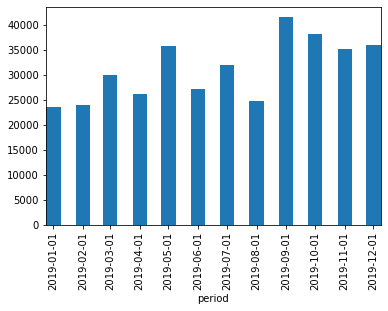

In [15]:
# Crown Royal sales by month
df[df['item_description'] == 'Crown Royal'].groupby(['period']).sum()['volume_sold_liters'].plot.bar(width=15) 

## Exploring Multiple Values

<AxesSubplot:xlabel='period'>

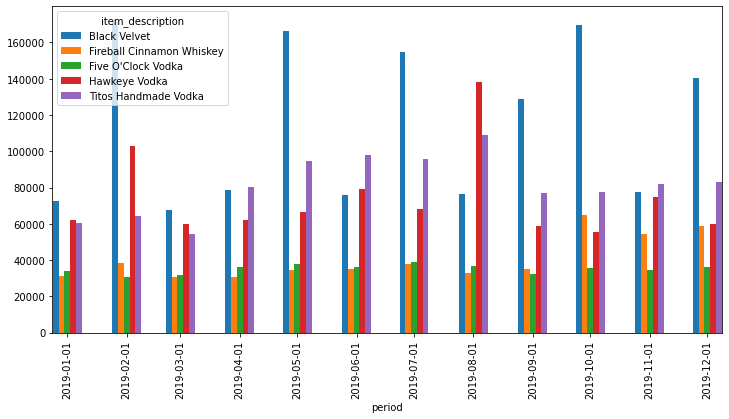

In [20]:
# Resetting the index is an easy way to pop a groupby that was done over multiple index columns back into a non-nested tabular view
dagg = df.groupby(['item_description']).sum().nlargest(5, ['volume_sold_liters']).reset_index() 

# This statement says to check if item_description is in the nlargest array we just made. 
# If so, group by the description and period and sum the rows for each.
dfm = df[df['item_description'].isin(dagg['item_description'])].groupby(['item_description','period']).sum() 

# Pivot and display the result.
di = dfm.reset_index()
di.pivot(index='period', columns='item_description', values='volume_sold_liters').plot.bar(figsize=(12,6),width=15)

